In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)



# Combine the data into a single dataset
all_data = pd.merge(city_data, ride_data, on="city", how="outer")
all_data = all_data.rename(columns={"driver_count":"driver count", "ride_id":"ID"})

# Display the data table for preview
all_data.head()

,city,driver count,type,date,fare,ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

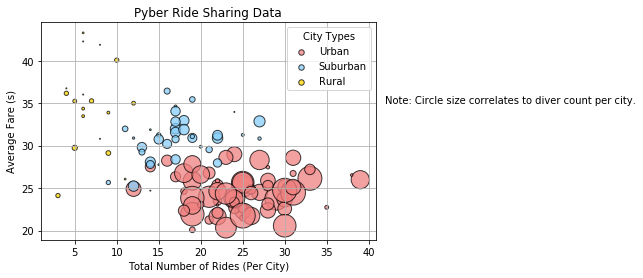

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Urban Data
urban_data = all_data.loc[all_data["type"] == "Urban"]

urban_city_group = urban_data.groupby('city')

urban_ride_count = urban_city_group['ID'].count()

urban_fare_avg = urban_city_group['fare'].mean()

urban_driver_count = urban_city_group['driver count'].sum() / urban_city_group['driver count'].value_counts()

urban_driver_count

# Suburban Data

suburban_data = all_data.loc[all_data["type"] == "Suburban"]

suburban_city_group = suburban_data.groupby('city')

suburban_ride_count = suburban_city_group['ID'].count()

suburban_fare_avg = suburban_city_group['fare'].mean()

suburban_driver_count = suburban_city_group['driver count'].sum() / suburban_city_group['driver count'].value_counts()


# Rural Data

rural_data = all_data.loc[all_data["type"] == "Rural"]

rural_city_group = rural_data.groupby('city')

rural_ride_count = rural_city_group['ID'].count()

rural_fare_avg = rural_city_group['fare'].mean()

rural_driver_count = rural_city_group['driver count'].sum() / rural_city_group['driver count'].value_counts()




# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_ride_count, urban_fare_avg, marker="o", facecolors="lightcoral", label="Urban", edgecolors="black", linewidth=1,
            s=(urban_driver_count)**1.5, alpha=0.75)

suburban_plot = plt.scatter(suburban_ride_count, suburban_fare_avg, marker="o", facecolors="lightskyblue", label="Suburban", edgecolors="black", linewidth=1,
            s=(suburban_driver_count)**1.5, alpha=0.75)

rural_plot = plt.scatter(rural_ride_count, rural_fare_avg, marker="o", facecolors="gold", label="Rural", edgecolors="black", linewidth=1,
            s=(rural_driver_count)**1.5, alpha=0.75)




# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (s)")


# Create a legend
lgnd = plt.legend(handles=[urban_plot, suburban_plot, rural_plot], loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]



# Incorporate a text label regarding circle size

plt.text(42, 35, r'Note: Circle size correlates to diver count per city.')


# Save Figure
plt.savefig("../BubblePlot.png")

# Show plot
plt.show()


## Total Fares by City Type

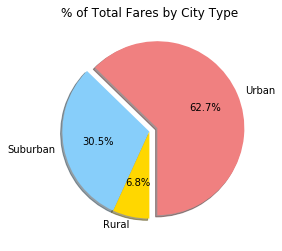

In [4]:
# Calculate Type Percents

urban_fare_total = urban_data['fare'].sum()
suburban_fare_total = suburban_data['fare'].sum()
rural_fare_total = rural_data['fare'].sum()

# Build Pie Chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [urban_fare_total, suburban_fare_total, rural_fare_total]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("../TotalFaresPie.png")

# Show Figure
plt.show()


## Total Rides by City Type

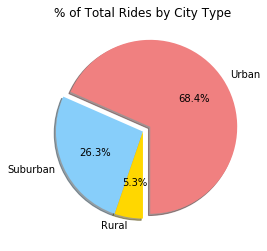

In [5]:
# Calculate Ride Percents
urban_ride_total = urban_data['ID'].count()
suburban_ride_total = suburban_data['ID'].count()
rural_ride_total = rural_data['ID'].count()

# Build Pie Chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [urban_ride_total, suburban_ride_total, rural_ride_total]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../TotalRidesPie.png")

# Show Figure
plt.show()


## Total Drivers by City Type

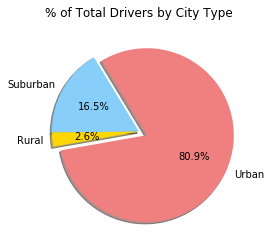

In [6]:
# Calculate Driver Percents


urban_city_data = city_data.loc[city_data["type"] == "Urban"]
urban_driver_total = urban_city_data['driver_count'].sum()

suburban_city_data = city_data.loc[city_data["type"] == "Suburban"]
suburban_driver_total = suburban_city_data['driver_count'].sum()

rural_city_data = city_data.loc[city_data["type"] == "Rural"]
rural_driver_total = rural_city_data['driver_count'].sum()

# # Build Pie Charts
labels = 'Urban', 'Suburban', 'Rural'
sizes = [urban_driver_total, suburban_driver_total, rural_driver_total]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=190)

plt.title("% of Total Drivers by City Type")

# # Save Figure
plt.savefig("../TotalDriversPie.png")

# Show Figure
plt.show()

Observable Trends:
1. There appears to be a negative correlation between average fare and total number of rides. This makes sense considering multipule short distant rides would have a lower average fare than a couple of longer distant rides.
2. While the majority of business exists in Urban cities, it might be better to be a driver in a suburban or rural city, because you would have less drivers to compete with.
3. There are some Urban cities that appear to have a low driver count, it might be a good idea to market for new drivers in these areas.